In [153]:
import pandas as pd
import warnings
import japanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.core.display import display, HTML 
# display(HTML("<style>.container { width:80% !important; }</style>"))
warnings.filterwarnings('ignore')
train=pd.read_csv("train_data.csv")
test=pd.read_csv("test_data.csv")
import pandas_profiling as pdp
df=pd.concat([train,test],sort=False)


# NullCheck

In [154]:
df.isnull().sum()

id                   0
position             0
age                  0
area                 0
sex                  0
partner              0
num_child            0
education            0
service_length       0
study_time           0
commute              0
overtime             0
salary            9000
dtype: int64

# MissCheck

In [138]:
for i in df.columns:
    print(i)
    print(df[i].unique())


id
[    0     1     2 ... 20997 20998 20999]
position
[1 2 0 3 4]
age
[44 31 36 22 25 23 32 21 43 46 27 50 24 35 26 33 39 48 29 41 55 40 20 53
 34 42 52 45 56 49 47 28 54 30 37 18 51 38 19 57 59 63 58 61 62 65 60 66
 67 64]
area
['愛知県' '奈良県' '山口県' '東京都' '鹿児島県' '兵庫県' '神奈川県' '宮城県' '茨城県' '岩手県' '鳥取県' '岡山県'
 '愛媛県' '新潟県' '島根県' '和歌山県' '高知県' '石川県' '熊本県' '埼玉県' '佐賀県' '香川県' '宮崎県' '福島県'
 '大阪府' '大分県' '岐阜県' '長崎県' '広島県' '北海道' '富山県' '山形県' '徳島県' '青森県' '千葉県' '滋賀県'
 '沖縄県' '三重県' '長野県' '京都府' '栃木県' '福井県' '山梨県' '秋田県' '静岡県' '群馬県' '福岡県']
sex
[2 1]
partner
[1 0]
num_child
[2 0 3 4 1 5 6 7 8 9]
education
[1 0 2 4 3]
service_length
[24 13 14  4  5  3 25  9 30  6 17  0 11 19 28  8 21  2 37 32 18  7  1 35
 20 16 33 26 27 10 22 36 29 34 12 31 15 23 43 39 40 38 41 45 44 42 47 49]
study_time
[ 2.  9.  4.  3.  5. 11.  7.  0.  6. 10.  1.  8. 20. 12. 17. 13. 18. 14.
 15. 16. 19. 21. 24.]
commute
[1.6 0.7 0.4 0.2 1.3 1.7 0.1 0.5 1.4 0.9 0.3 2.1 1.8 1.5 0.6 1.2 0.8 1.1
 1.9 2.2 4.3 2.3 1.  3.6 2.  2.5 2.4 2.9 3.3 4.2 4.  2

# Data visualization

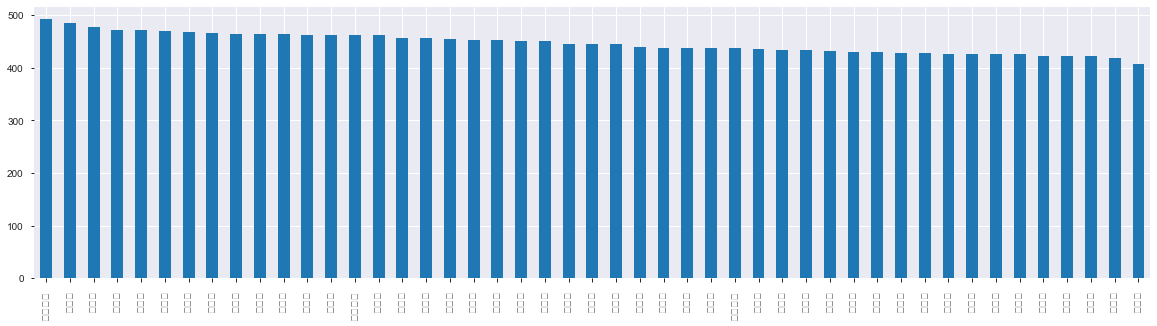

In [139]:
train['area'].value_counts().plot.bar(figsize=(20, 5))


## log Salary

In [140]:
# df.salary=np.log(df.salary)
# #transformed histogram and normal probability plot
# sns.distplot(df.salary.dropna(), fit=norm);
# fig = plt.figure()
# res = stats.probplot(df.salary, plot=plt)

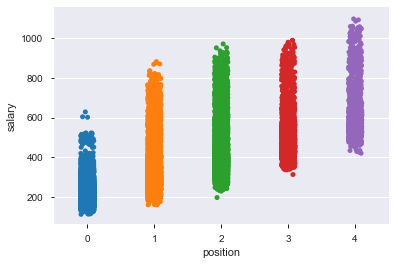

In [141]:
sns.stripplot(x="position",y="salary",data=df)#正の相関あり?

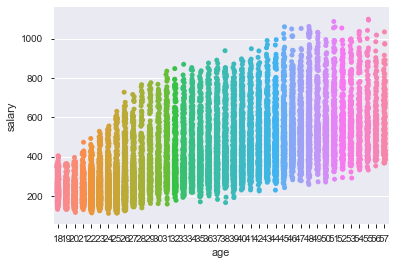

In [142]:
df.age=df.age.map(lambda x:57 if x>58 else x)
sns.stripplot(x="age",y="salary",data=df[df.age<58])#正の相関

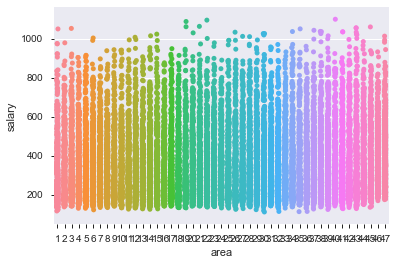

In [143]:
arealist=list(train.groupby("area").mean().salary.sort_values().index)
areadic={}
for i,area in enumerate(arealist):
    areadic[area]=i+1
df.area=df.area.map(areadic)
sns.stripplot(x="area",y="salary",data=df)#やや地域差はある

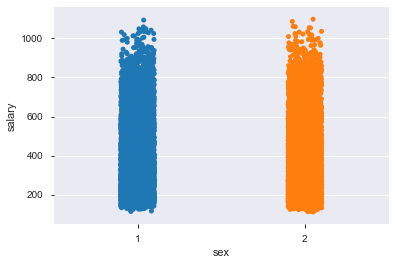

In [144]:
sns.stripplot(x="sex",y="salary",data=df)#そんなに性差はなさそう

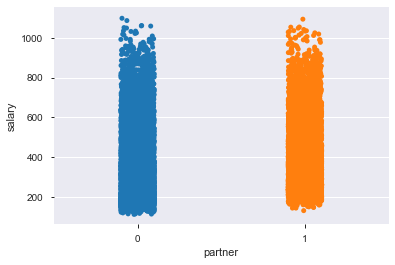

In [145]:
sns.stripplot(x="partner",y="salary",data=df)#正の相関

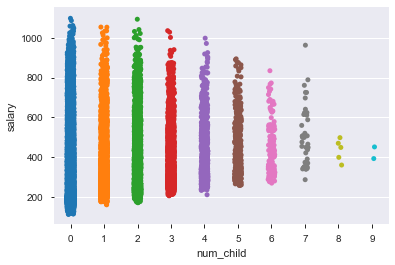

In [146]:
sns.stripplot(x="num_child",y="salary",data=df)#子が多くなるにつれて給与の幅が縮まりそう

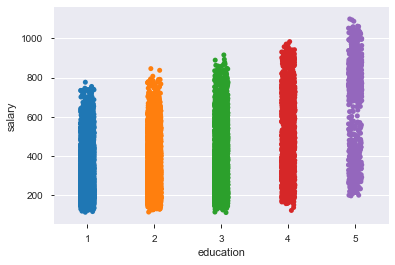

In [147]:
df.education=df.education+1
sns.stripplot(x="education",y="salary",data=df)#正の相関

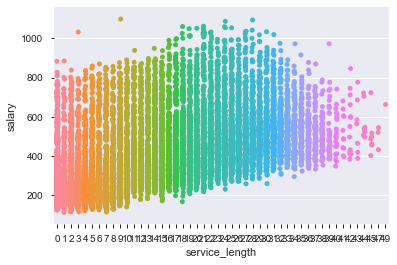

In [148]:
sns.stripplot(x="service_length",y="salary",data=df)#正の相関

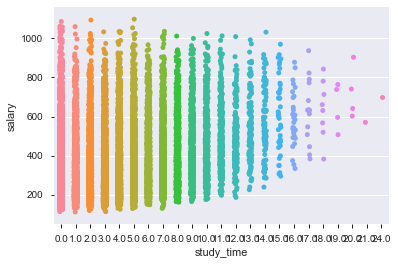

In [149]:
# df.study_time=df.study_time*30
sns.stripplot(x="study_time",y="salary",data=df)#正の相関

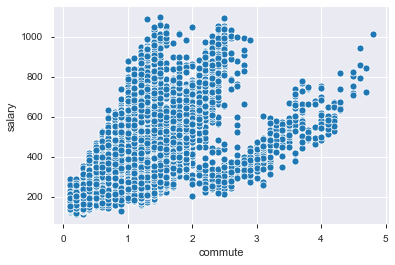

In [150]:
# df.commute=df.commute*2*28*5/7
sns.scatterplot(x="commute",y="salary",data=df)#意味不明

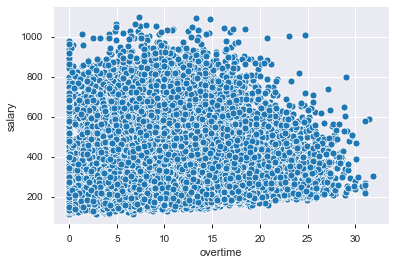

In [151]:
sns.scatterplot(x="overtime",y="salary",data=df)#正の相関

In [152]:
arealist=list(train.groupby("area").mean().salary.sort_values().index)
areadic={}
for i,area in enumerate(arealist):
    areadic[area]=i+1
df.area=df.area.map(areadic)
df.position=df.position+1
df.sex=df.sex-1

# additional feature

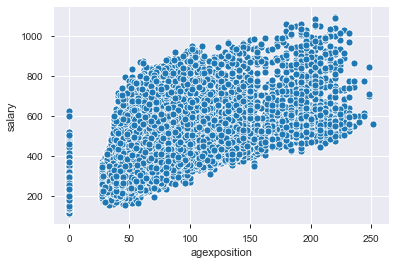

In [155]:
df["agexposition"]=df.age*df.position.map(lambda x:1.5 if x==1 else x)
sns.scatterplot(x="agexposition",y="salary",data=df)

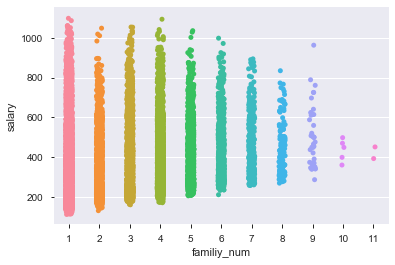

In [123]:
df["familiy_num"]=1+df.partner+df.num_child

sns.stripplot(x="familiy_num",y="salary",data=df)

In [124]:
# df["educationxage"]=df.education*df.age
# sns.scatterplot(x="educationxage",y="salary",data=df)

In [125]:
# df["overbool"]=df.overtime.map(lambda x:0 if x==0 else 1)
# df["studybool"]=df.study_time.map(lambda x:0 if x==0 else 1)


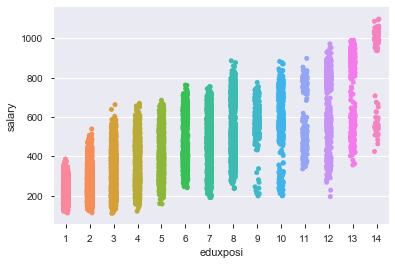

In [126]:

df["eduxposi"]=df.education*df.position
eduposilist=list(df.groupby("eduxposi").mean().salary.sort_values().index)
eduposidic={}
for i,eduposi in enumerate(eduposilist):
    eduposidic[eduposi]=i+1
df.eduxposi=df.eduxposi.map(eduposidic)
df.eduxposi
sns.stripplot(x="eduxposi",y="salary",data=df)

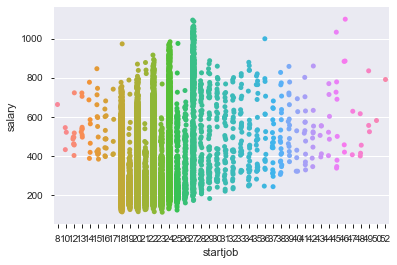

In [127]:
df["startjob"]=df.age-df.service_length
sns.stripplot(x="startjob",y="salary",data=df)

In [128]:
# fresh=((df.education==1)&(df.startjob==18))|((df.education==2)&(df.startjob==20))|((df.education==3)&(df.startjob==22))|((df.education==4)&(df.startjob==24))|((df.education==5)&(df.startjob==27))

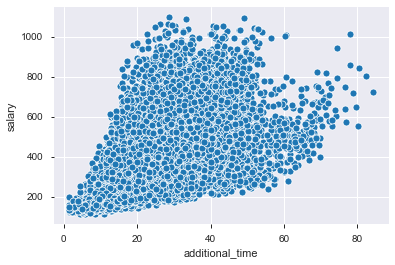

In [129]:
df["additional_time"]=df.overtime+20*df.commute*5/7
sns.scatterplot(x="additional_time",y="salary",data=df)

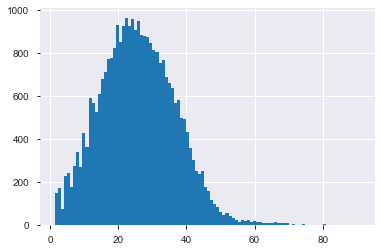

In [130]:
df.additional_time.hist(bins=100)

In [131]:
# df.loc[fresh == True, 'fresh'] = int(1 )
# df.loc[fresh == False, 'fresh'] = int(0)

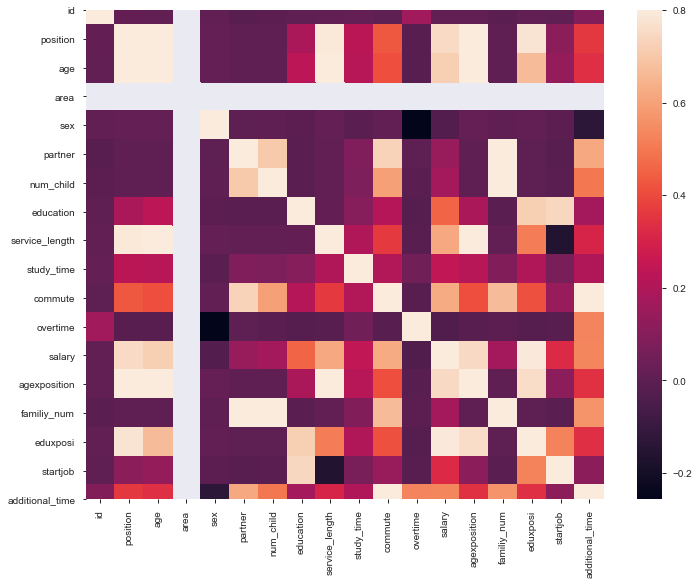

In [132]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

## LeakCheck

In [96]:
# df[df.drop(["id","salary"],axis=1).duplicated(keep=False)]#リークは一つだけ

# Learning

In [99]:
from sklearn.model_selection import train_test_split, GridSearchCV
df.salary=np.log(df.salary)
# train=df.dropna().drop(["id","sex"],axis=1)
# test=df[df.salary.isnull()].drop(["id","sex"],axis=1)
train=df.dropna().drop(["id"],axis=1)
test=df[df.salary.isnull()].drop(["id"],axis=1)
test=test.drop(["salary",],axis=1)
X = train.drop(["salary"],axis=1)

test= pd.get_dummies(test,drop_first=True, columns=['area','eduxposi'])
X = pd.get_dummies(train,drop_first=True, columns=['area','eduxposi']).drop(["salary"],axis=1)
#　目的変数に家賃単価を代入する
y = train.salary
train_X, valid_X,train_y, valid_y = train_test_split(X,y,test_size=0.2,random_state=43)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [104]:
df

id  position  age  area  sex  partner  num_child  education  \
0        0         2   44   NaN    1        1          2          2   
1        1         3   31   NaN    0        0          0          1   
2        2         3   36   NaN    0        0          0          3   
3        3         1   22   NaN    1        0          0          1   
4        4         1   25   NaN    1        0          0          2   
...    ...       ...  ...   ...  ...      ...        ...        ...   
8995  8995         2   43   NaN    1        0          0          1   
8996  8996         3   40   NaN    1        0          0          1   
8997  8997         5   46   NaN    0        0          0          1   
8998  8998         1   22   NaN    0        0          0          1   
8999  8999         3   49   NaN    0        1          0          3   

      service_length  study_time  commute  overtime    salary  agexposition  \
0                 24         2.0      1.6       9.2  1.801594          88.0   
1                 13         9.0      0.7      12.4  1.751256          93.0   
2                 14         4.0      0.4      16.9  1.771338         108.0   
3                  4         3.0      0.4       6.1  1.668622          33.0   
4                  5         3.0      0.2       4.9  1.645222          37.5   
...              ...         ...      ...       ...       ...           ...   
8995              25         3.0      0.7       0.0       NaN          86.0   
8996              22         8.0      0.7       5.7       NaN         120.0   
8997              28         2.0      0.8       0.0       NaN         230.0   
8998               4         0.0      0.1       0.7       NaN          33.0   
8999              27         0.0      1.7      11.0       NaN         147.0   

      familiy_num  eduxposi  startjob  additional_time  
0               4         4        20        32.057143  
1               1         3        18        22.400000  
2               1         6        22        22.614286  
3               1         1        18        11.814286  
4               1         2        20         7.757143  
...           ...       ...       ...              ...  
8995            1         2        18        10.000000  
8996            1         3        18        15.700000  
8997            1         9        18        11.428571  
8998            1         1        18         2.128571  
8999            2         6        22        35.285714  

[30000 rows x 18 columns]

In [48]:
pdp.ProfileReport(train)

# Liner

In [49]:
#重回帰分析
import sklearn
from sklearn.linear_model import LinearRegression as LR

model=LR()

model.fit(train_X, train_y)

linearpred=model.predict(valid_X)
model.score(valid_X,valid_y)

0.8610447235436355

# Randomforest+Feature Importances

In [98]:
from sklearn.ensemble import RandomForestRegressor as RFR
import numpy as np
from sklearn.metrics import mean_absolute_error

rg = RFR(n_jobs=-1, random_state=2525)
 
rg.fit(train_X,train_y)
print(rg.score(valid_X,valid_y))
from sklearn.metrics import mean_squared_error
score=mean_absolute_error(np.exp(valid_y),np.exp(rg.predict(valid_X)))
print(f'MAE:{score:4f}')
fti = rg.feature_importances_

print('Feature Importances:')
for i,feat in enumerate(valid_X.columns):
    print('\t{0:10s} : {1:>.6f}'.format(feat, fti[i]))
col_names = test.columns.values
col_names_ = col_names[np.argsort(rg.feature_importances_)[::-1]]
col_names_

NameError: name 'train_X' is not defined

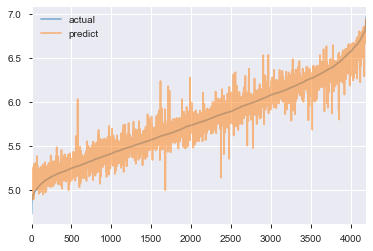

In [51]:
checktesty=valid_y.sort_values()
checktestX=valid_X.ix[list(checktesty.index)]
checktesty=checktesty.reset_index(drop=True)#これと

checkpred=pd.DataFrame(rg.predict(checktestX))#これ
check=pd.concat([checktesty,checkpred], axis=1)
check.columns=["actual","predict"]
check.plot(alpha=0.5)

# ModelSelection


 80%|████████  | 8/10 [04:07<00:38, 19.40s/it]

[11:55:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:55:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:55:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:55:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:55:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:56:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:56:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:56:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:56:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is n


100%|██████████| 10/10 [05:08<00:00, 30.89s/it]


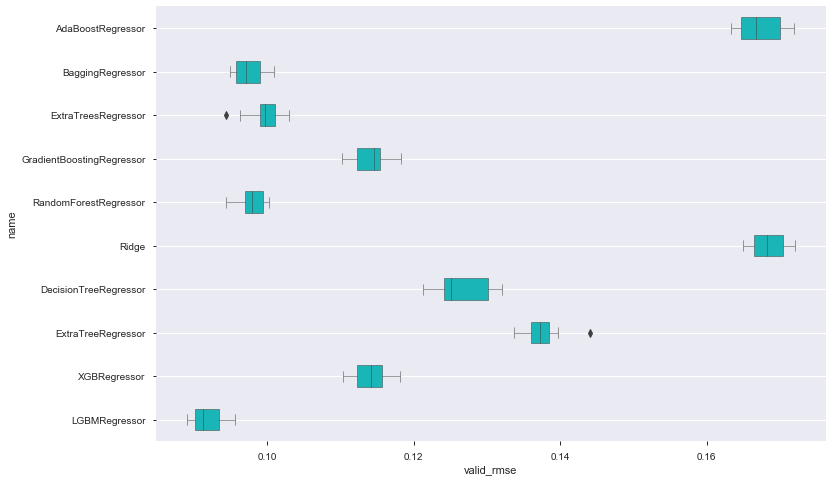

In [253]:
# 特徴量を選択して、複数のモデルで精度を調査する
from scipy.stats import mstats
from tqdm import tqdm
import matplotlib
from sklearn import metrics,  feature_selection, ensemble, gaussian_process, linear_model, naive_bayes, neighbors, svm, tree, discriminant_analysis, model_selection
# from imblearn import under_sampling, over_sampling
from sklearn.metrics import make_scorer
import lightgbm as lgb
import xgboost as xgb
import catboost as cat
base_color = 'darkturquoise'
base_color2 = 'gray'

def generate_cmap(colors):
    
    values = range(len(colors))
    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append((v/vmax, c))
    return matplotlib.colors.LinearSegmentedColormap.from_list('custom_cmap', color_list)
cm = generate_cmap([base_color2, 'white', base_color])

def rmse_score(y_true, y_pred):
    """RMSE (Root Mean Square Error: 平均二乗誤差平方根) を計算する関数"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

params={'booster': 'dart', 
        'alpha': 0.009385870161072372, 
        'max_depth': 9, 'eta': 2.3698818355249718e-07,
        'gamma': 3.167530221746867e-05, 
        'grow_policy': 'lossguide',
        'sample_type': 'weighted',
        'normalize_type': 'forest',
        'rate_drop': 3.1207262366715483e-08,
        'skip_drop': 1.2650261386504368e-05}


models = [
 
    #Ensemble Methods
    ensemble.AdaBoostRegressor(),
    ensemble.BaggingRegressor(),
    ensemble.ExtraTreesRegressor(),
    ensemble.GradientBoostingRegressor(),
    ensemble.RandomForestRegressor(),
 
    #Gaussian Processes
#     gaussian_process.GaussianProcessRegressor(),
    
    #GLM
    linear_model.Ridge(),

    
    #Trees    
    tree.DecisionTreeRegressor(),
    tree.ExtraTreeRegressor(),
 
    #xgboost
    xgb. XGBRegressor(),
    lgb.LGBMRegressor(),
#     cat.CatBoostRegressor(),
    
]
 
df_compare = pd.DataFrame(columns=['name', 'train_rmse', 'valid_rmse', 'time'])
score_funcs = {
    'rmse': make_scorer(rmse_score),
}

for model in tqdm(models):
    
    name = model.__class__.__name__
    
    cv_rlts = model_selection.cross_validate(model,X,y, scoring=score_funcs, cv=10, return_train_score=True)
 
    for i in range(10):
        s = pd.Series([name, cv_rlts['train_rmse'][i], cv_rlts['test_rmse'][i], cv_rlts['fit_time'][i]], index=df_compare.columns, name=name+str(i))
        df_compare = df_compare.append(s)
        
plt.figure(figsize=(12,8))
sns.boxplot(data=df_compare, y='name', x='valid_rmse', orient='h', color=base_color, linewidth=0.5, width=0.5)
plt.grid()
plt.show()

In [52]:
cols = X.columns.tolist()
 
# positive_cnt = int(df['salary'].sum())

feature_importance_models = [
    ensemble.AdaBoostRegressor(),
    ensemble.ExtraTreesRegressor(),
    ensemble.GradientBoostingRegressor(),
    ensemble.RandomForestRegressor(),
    tree.DecisionTreeRegressor(),
    xgb.XGBRegressor(),
    lgb.LGBMRegressor()
]
 
scoring = ['rsme']
df_rfe_cols_cnt = pd.DataFrame(columns=['cnt'], index=cols)
df_rfe_cols_cnt['cnt'] = 0
 
for i, model in tqdm(enumerate(feature_importance_models), total=len(feature_importance_models)):
    
    rfe = feature_selection.RFECV(model, step=3)
    rfe.fit(X, y)
#     print(rfe.get_support())
    rfe_cols = X[cols].columns.values[rfe.get_support()]
    df_rfe_cols_cnt.loc[rfe_cols, 'cnt'] += 1
    
df_rfe_cols_cnt.plot(kind='bar', color=base_color, figsize=(15, 5))
plt.show()

NameError: name 'ensemble' is not defined

In [386]:
x_cols = df_rfe_cols_cnt[df_rfe_cols_cnt['cnt'] < 4].index
X=X.drop(x_cols,axis=1)
test=test.drop(x_cols,axis=1)
train_X, valid_X,train_y, valid_y = train_test_split(X,y,test_size=0.2,random_state=43)

In [62]:
# cat_list = ['area', 'sex', 'partner','education']

## XGBoost+optuna

In [55]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
import optuna
from sklearn.metrics import r2_score

class RidgeCV():
    model_cls = Ridge

    def __init__(self, n_trials=100):
        self.n_trials = n_trials

    def fit(self, X, y):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
            y = pd.DataFrame(y)
        elif isinstance(X, pd.DataFrame):
            X = X.reset_index(drop=True)
            y = y.reset_index(drop=True)

        self.X = X
        self.y = y

        study = optuna.create_study(direction='maximize')
        study.optimize(self, n_trials=self.n_trials)
        self.best_trial = study.best_trial

        print()
        print("Best score:", round(self.best_trial.value, 2))
        print("Best params:", self.best_trial.params)
        print()

        self.best_model = self.model_cls(**self.best_trial.params)
        self.best_model.fit(self.X, self.y)

    def predict(self, X):
        if isinstance(X, pd.Series):
            X = pd.DataFrame(X.values.reshape(1, -1))
        elif isinstance(X, np.ndarray):
            X = pd.DataFrame(X)

        return self.best_model.predict(X)

    def score(self, X, y):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
            y = pd.DataFrame(y)

        return self.best_model.score(X, y)

    def kfold_cv(self, model, splits=5):
        scores = []

        kf = KFold(n_splits=splits, shuffle=True)
        for train_index, test_index in kf.split(self.X):
            X_train, X_test = self.X.iloc[train_index], self.X.iloc[test_index]
            y_train, y_test = self.y.iloc[train_index], self.y.iloc[test_index]
            model.fit(X_train, y_train)
            scores.append(r2_score(model.predict(X_test), y_test))

        score = np.array(scores).mean()
        return score

import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

class XGBRegressorCV(RidgeCV):
    model_cls = xgb.XGBRegressor

    def __call__(self, trial):
        booster = trial.suggest_categorical('booster', ['gbtree', 'dart'])
        alpha = trial.suggest_loguniform('alpha', 1e-8, 1.0)

        max_depth = trial.suggest_int('max_depth', 1, 20)
        eta = trial.suggest_loguniform('eta', 1e-8, 1.0)
        gamma = trial.suggest_loguniform('gamma', 1e-8, 1.0)
        grow_policy = trial.suggest_categorical(
            'grow_policy', ['depthwise', 'lossguide'])

        if booster == 'gbtree':
            model = self.model_cls(silent=1, booster=booster,
                                   alpha=alpha, max_depth=max_depth, eta=eta,
                                   gamma=gamma, grow_policy=grow_policy)
        elif booster == 'dart':
            sample_type = trial.suggest_categorical('sample_type',
                                                    ['uniform', 'weighted'])
            normalize_type = trial.suggest_categorical('normalize_type',
                                                       ['tree', 'forest'])
            rate_drop = trial.suggest_loguniform('rate_drop', 1e-8, 1.0)
            skip_drop = trial.suggest_loguniform('skip_drop', 1e-8, 1.0)
            model = self.model_cls(silent=1, booster=booster,
                                   alpha=alpha, max_depth=max_depth, eta=eta,
                                   gamma=gamma, grow_policy=grow_policy,
                                   sample_type=sample_type,
                                   normalize_type=normalize_type,
                                   rate_drop=rate_drop, skip_drop=skip_drop)

        score = self.kfold_cv(model)
        return score

xgbr = XGBRegressorCV(n_trials=20)
xgbr.fit(train_X, train_y)

pred_y=xgbr.predict(valid_X)
score=mean_absolute_error(np.exp(valid_y),np.exp(xgbr.predict(valid_X)))
print(f'MAE:{score:4f}')
#MAE:22.821581(drop)dummy
#MAE:22.753628(nodrop)dummy

[I 2019-11-18 23:40:42,327] Finished trial#0 resulted in value: 0.9551699770912034. Current best value is 0.9551699770912034 with parameters: {'booster': 'dart', 'alpha': 0.3085115174101181, 'max_depth': 9, 'eta': 1.0732568515145836e-06, 'gamma': 2.182939359055782e-05, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 1.061792612896835e-05, 'skip_drop': 0.3430440791917346}.
[I 2019-11-18 23:41:42,017] Finished trial#1 resulted in value: 0.9526495318971703. Current best value is 0.9551699770912034 with parameters: {'booster': 'dart', 'alpha': 0.3085115174101181, 'max_depth': 9, 'eta': 1.0732568515145836e-06, 'gamma': 2.182939359055782e-05, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 1.061792612896835e-05, 'skip_drop': 0.3430440791917346}.
[I 2019-11-18 23:41:53,507] Finished trial#2 resulted in value: 0.8174511403420268. Current best value is 0.9551699770912034 with parameters: {'booster': 


Best score: 0.96
Best params: {'booster': 'gbtree', 'alpha': 9.279257368332313e-07, 'max_depth': 14, 'eta': 0.0014466374754946892, 'gamma': 0.008724424777063254, 'grow_policy': 'depthwise'}

[00:10:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE:22.886663


position  age  sex  partner  num_child  education  service_length  \
0             2   44    1        1          2          2              24   
1             3   31    0        0          0          1              13   
2             3   36    0        0          0          3              14   
3             1   22    1        0          0          1               4   
4             1   25    1        0          0          2               5   
...         ...  ...  ...      ...        ...        ...             ...   
20995         1   27    1        0          0          2               7   
20996         1   22    1        0          0          1               4   
20997         4   36    1        0          0          3              14   
20998         1   21    1        1          2          2               0   
20999         2   30    0        0          0          4               6   

       study_time  commute  overtime  ...  area_37  area_44  area_45  area_46  \
0             2.0      1.6       9.2  ...        0        0        1        0   
1             9.0      0.7      12.4  ...        0        0        0        0   
2             4.0      0.4      16.9  ...        0        0        0        0   
3             3.0      0.4       6.1  ...        0        0        0        0   
4             3.0      0.2       4.9  ...        0        0        0        0   
...           ...      ...       ...  ...      ...      ...      ...      ...   
20995         2.0      0.2      15.5  ...        0        0        0        0   
20996         3.0      0.2      13.4  ...        0        1        0        0   
20997         4.0      0.8      12.7  ...        0        0        0        0   
20998         1.0      1.0      10.9  ...        0        0        0        0   
20999         0.0      0.5      19.8  ...        0        0        0        0   

       area_47  eduxposi_2  eduxposi_3  eduxposi_4  eduxposi_5  eduxposi_13  
0            0           0           0           1           0            0  
1            0           0           1           0           0            0  
2            0           0           0           0           0            0  
3            1           0           0           0           0            0  
4            0           1           0           0           0            0  
...        ...         ...         ...         ...         ...          ...  
20995        0           1           0           0           0            0  
20996        0           0           0           0           0            0  
20997        0           0           0           0           0            0  
20998        0           1           0           0           0            0  
20999        0           0           0           0           0            0  

[21000 rows x 26 columns]

# LightGBM+optuna

[I 2019-11-18 23:35:06,096] Finished trial#0 resulted in value: 0.9454941817825983. Current best value is 0.9454941817825983 with parameters: {'booster': 'gbtree', 'iterations': 309, 'depth': 23, 'learning_rate': 0.09654858601305907, 'random_strength': 1, 'bagging_temperature': 0.11878187801208552, 'od_type': 'IncToDec', 'od_wait': 33, 'lambda_l1': 8.124626268579605e-07, 'lambda_l2': 3.1899395778800063e-06, 'num_leaves': 13, 'feature_fraction': 0.7208478857954597, 'bagging_fraction': 0.76616863139859, 'bagging_freq': 4, 'min_child_samples': 40}.
[I 2019-11-18 23:35:09,094] Finished trial#1 resulted in value: 0.9535583232443428. Current best value is 0.9535583232443428 with parameters: {'booster': 'gbtree', 'iterations': 133, 'depth': 14, 'learning_rate': 0.16798433101610669, 'random_strength': 63, 'bagging_temperature': 0.5193644076485131, 'od_type': 'Iter', 'od_wait': 38, 'lambda_l1': 1.1162704753712194e-08, 'lambda_l2': 2.7116885698319827e-05, 'num_leaves': 40, 'feature_fraction': 0.


Best score: 0.96
Best params: {'booster': 'gbtree', 'iterations': 252, 'depth': 20, 'learning_rate': 0.0783530701074473, 'random_strength': 87, 'bagging_temperature': 0.05361131776651505, 'od_type': 'Iter', 'od_wait': 39, 'lambda_l1': 2.8244707888732837e-05, 'lambda_l2': 2.3186341622370716e-07, 'num_leaves': 132, 'feature_fraction': 0.7780029243858917, 'bagging_fraction': 0.8727412749378808, 'bagging_freq': 6, 'min_child_samples': 40}

MAE:22.978763


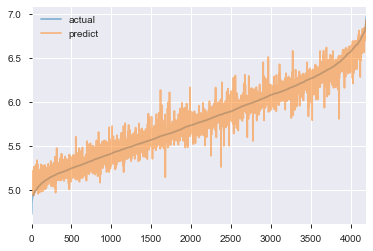

In [54]:
# coding:utf-8
import lightgbm as lgb
# from sklearn.metrics import log_loss
def min_max_normalization(x):
    x_min = x.min()
    x_max = x.max()
    x_norm = (x - x_min) / ( x_max - x_min)
    return x_norm
def min_max_renormalization(x1,x2):
    x_min = x2.min()
    x_max = x2.max()
#     x_norm = (x2 - x_min) / ( x_max - x_min)
    x=x1*  ( x_max - x_min)+x_min
    return x

import lightgbm as lgb
# from sklearn.metrics import log_loss
cat_list = ['area', 'sex', 'partner','education']
class LGBRegressorCV(RidgeCV):
    model_cls = lgb.LGBMRegressor
    def __call__(self, trial):
        params = {
            'eval_metric':'mae',
            'booster':trial.suggest_categorical('booster',['gbtree','gblinear']),
            'loss_function': 'fair',
            'iterations' : trial.suggest_int('iterations', 50, 400),                      
            'depth' : trial.suggest_int('depth', 4, 25),                                      
            'learning_rate' : trial.suggest_loguniform('learning_rate', 0.01, 1),               
            'random_strength' :trial.suggest_int('random_strength', 0, 100),                       
            'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 100.00), 
            'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
            'od_wait' :trial.suggest_int('od_wait', 10, 50),
            'metric': 'binary_logloss',
            'verbosity': -1,
            'boosting_type': 'gbdt',
            'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
            'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
            'num_leaves': trial.suggest_int('num_leaves', 2, 256),
            'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
            'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
            'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
            'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }
        model=self.model_cls(**params)
        score = self.kfold_cv(model)
        return score

model=LGBRegressorCV(n_trials=20)
model.fit(train_X,train_y)

pred_y=model.predict(valid_X)
score=mean_absolute_error(np.exp(valid_y),np.exp(pred_y))
print(f'MAE:{score:4f}')
# pred=model.predict(test)
    
checktesty=valid_y.sort_values()
checktestX=valid_X.ix[list(checktesty.index)]
checktesty=checktesty.reset_index(drop=True)#これと

checkpred=pd.DataFrame(model.predict(checktestX))#これ
check=pd.concat([checktesty,checkpred], axis=1)
check.columns=["actual","predict"]
check.plot(alpha=0.5)
#MAE:23.144563 (nodrop)dummy
#MAE:23.742147(drop)dummy
#MAE:23.902507nodummy

In [373]:
    
class LGBRegressor1CV(RidgeCV):
    model_cls = lgb.LGBMRegressor
    def __call__(self, trial):
        params = {
            'loss_function': 'xentropy loss',
            'iterations' : trial.suggest_int('iterations', 50, 300),                      
            'depth' : trial.suggest_int('depth', 8, 20),                                      
            'learning_rate' : trial.suggest_loguniform('learning_rate', 0.01, 1),               
            'random_strength' :trial.suggest_int('random_strength', 0, 100),                       
            'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 100.00), 
            'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
            'od_wait' :trial.suggest_int('od_wait', 10, 50)
    }
        model=self.model_cls(**params)
        score = self.kfold_cv(model)
        return score

model=LGBRegressor1CV(n_trials=40)
train_ylgm=min_max_normalization(train_y)
model.fit(train_X,train_ylgm)

pred_y=min_max_renormalization(model.predict(valid_X),train_y)
score=mean_absolute_error(np.exp(valid_y),np.exp(pred_y))
print(f'MAE:{score:4f}')
pred=model.predict(test)


[I 2019-11-18 18:55:39,033] Finished trial#0 resulted in value: 0.9281146151684363. Current best value is 0.9281146151684363 with parameters: {'iterations': 299, 'depth': 13, 'learning_rate': 0.9735584437355863, 'random_strength': 68, 'bagging_temperature': 0.038503718269643196, 'od_type': 'IncToDec', 'od_wait': 33}.
[I 2019-11-18 18:56:01,971] Finished trial#1 resulted in value: 0.9549552122101819. Current best value is 0.9549552122101819 with parameters: {'iterations': 160, 'depth': 10, 'learning_rate': 0.08505698872657419, 'random_strength': 46, 'bagging_temperature': 0.6124333150722396, 'od_type': 'Iter', 'od_wait': 46}.
[I 2019-11-18 18:56:18,910] Finished trial#2 resulted in value: 0.9281375487037756. Current best value is 0.9549552122101819 with parameters: {'iterations': 160, 'depth': 10, 'learning_rate': 0.08505698872657419, 'random_strength': 46, 'bagging_temperature': 0.6124333150722396, 'od_type': 'Iter', 'od_wait': 46}.
[I 2019-11-18 18:56:31,906] Finished trial#3 resulted

KeyboardInterrupt: 

In [144]:
class LGBRegressor2CV(RidgeCV):
    model_cls = lgb.LGBMRegressor
    def __call__(self, trial):
        params = {
            
            'loss_function': 'regression_l1',
            'iterations' : trial.suggest_int('iterations', 50, 400),                      
            'depth' : trial.suggest_int('depth', 4, 25),                                      
            'learning_rate' : trial.suggest_loguniform('learning_rate', 0.01, 1),               
            'random_strength' :trial.suggest_int('random_strength', 0, 100),                       
            'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 100.00), 
            'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
            'od_wait' :trial.suggest_int('od_wait', 10, 50)
    }
        model=self.model_cls(**params)
        score = self.kfold_cv(model)
        return score

model=LGBRegressor2CV(n_trials=40)
model.fit(train_X,train_y)

pred_y=model.predict(valid_X)
score=mean_absolute_error(np.exp(valid_y),np.exp(pred_y))
print(f'MAE:{score:4f}')

[I 2019-11-18 00:02:34,239] Finished trial#0 resulted in value: 0.9569148322685755. Current best value is 0.9569148322685755 with parameters: {'iterations': 399, 'depth': 21, 'learning_rate': 0.13750394274194355, 'random_strength': 87, 'bagging_temperature': 23.688301507521178, 'od_type': 'Iter', 'od_wait': 32}.
[I 2019-11-18 00:02:38,582] Finished trial#1 resulted in value: 0.4902221876787675. Current best value is 0.9569148322685755 with parameters: {'iterations': 399, 'depth': 21, 'learning_rate': 0.13750394274194355, 'random_strength': 87, 'bagging_temperature': 23.688301507521178, 'od_type': 'Iter', 'od_wait': 32}.
[I 2019-11-18 00:02:42,366] Finished trial#2 resulted in value: 0.9331576859174158. Current best value is 0.9569148322685755 with parameters: {'iterations': 399, 'depth': 21, 'learning_rate': 0.13750394274194355, 'random_strength': 87, 'bagging_temperature': 23.688301507521178, 'od_type': 'Iter', 'od_wait': 32}.
[I 2019-11-18 00:02:44,900] Finished trial#3 resulted in v


Best score: 0.96
Best params: {'iterations': 55, 'depth': 22, 'learning_rate': 0.15022735769525583, 'random_strength': 40, 'bagging_temperature': 0.03207087240546606, 'od_type': 'Iter', 'od_wait': 41}

MAE:23.414411


## CatBoost+optuna(non recomended)

In [52]:
from catboost import CatBoost
# from sklearn.metrics import log_loss

class CatRegressorCV(RidgeCV):
    model_cls = CatBoost
    def __call__(self, trial):
        params = {
            'loss_function': 'RMSE',
#             'iterations' : trial.suggest_int('iterations', 50, 300),                      
            'depth' : trial.suggest_int('depth', 4, 16),                                      
            'learning_rate' : trial.suggest_loguniform('learning_rate', 0.01, 1),               
            'random_strength' :trial.suggest_int('random_strength', 0, 100),                       
            'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 100.00), 
            'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
            'od_wait' :trial.suggest_int('od_wait', 10, 50)
    }
        model=self.model_cls(params)
        score = self.kfold_cv(model)
        return score
model=CatRegressorCV()
model.fit(train_X,train_y)

pred_y=model.predict(valid_X)
score=mean_absolute_error(np.exp(valid_y),np.exp(model.predict(valid_X)))
print(f'MAE:{score:4f}')
pred=model.predict(test)

0:	learn: 0.4384277	total: 5.61ms	remaining: 5.61s
1:	learn: 0.4285259	total: 11.8ms	remaining: 5.89s
2:	learn: 0.4189667	total: 19.2ms	remaining: 6.37s
3:	learn: 0.4126162	total: 24.6ms	remaining: 6.13s
4:	learn: 0.4062148	total: 32.5ms	remaining: 6.47s
5:	learn: 0.3972057	total: 38.4ms	remaining: 6.37s
6:	learn: 0.3892128	total: 44.2ms	remaining: 6.27s
7:	learn: 0.3809407	total: 49.9ms	remaining: 6.19s
8:	learn: 0.3728918	total: 60.9ms	remaining: 6.7s
9:	learn: 0.3655981	total: 70.1ms	remaining: 6.94s
10:	learn: 0.3599157	total: 76.7ms	remaining: 6.89s
11:	learn: 0.3535651	total: 83.5ms	remaining: 6.88s
12:	learn: 0.3493127	total: 89.2ms	remaining: 6.78s
13:	learn: 0.3434051	total: 96.8ms	remaining: 6.82s
14:	learn: 0.3384453	total: 105ms	remaining: 6.93s
15:	learn: 0.3328524	total: 112ms	remaining: 6.89s
16:	learn: 0.3269959	total: 118ms	remaining: 6.8s
17:	learn: 0.3207634	total: 127ms	remaining: 6.91s
18:	learn: 0.3146285	total: 139ms	remaining: 7.16s
19:	learn: 0.3100011	total: 1

160:	learn: 0.1658935	total: 1.55s	remaining: 8.1s
161:	learn: 0.1656159	total: 1.56s	remaining: 8.07s
162:	learn: 0.1655277	total: 1.57s	remaining: 8.07s
163:	learn: 0.1654941	total: 1.58s	remaining: 8.08s
164:	learn: 0.1654018	total: 1.6s	remaining: 8.12s
165:	learn: 0.1653622	total: 1.62s	remaining: 8.12s
166:	learn: 0.1652721	total: 1.62s	remaining: 8.1s
167:	learn: 0.1652336	total: 1.64s	remaining: 8.11s
168:	learn: 0.1651917	total: 1.65s	remaining: 8.09s
169:	learn: 0.1649932	total: 1.66s	remaining: 8.09s
170:	learn: 0.1649496	total: 1.66s	remaining: 8.07s
171:	learn: 0.1648867	total: 1.67s	remaining: 8.05s
172:	learn: 0.1647676	total: 1.68s	remaining: 8.03s
173:	learn: 0.1643800	total: 1.69s	remaining: 8.01s
174:	learn: 0.1643661	total: 1.7s	remaining: 8s
175:	learn: 0.1643300	total: 1.71s	remaining: 7.98s
176:	learn: 0.1638879	total: 1.72s	remaining: 7.98s
177:	learn: 0.1636551	total: 1.72s	remaining: 7.95s
178:	learn: 0.1636145	total: 1.73s	remaining: 7.95s
179:	learn: 0.16354

KeyboardInterrupt: 

## Data engeneering for NN

In [66]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
categorical_variable_names = ["position","sex","education"]
# カテゴリ変数に一括変換
# x_dummy = pd.get_dummies(df[categorical_variable_names], drop_first=True,columns=categorical_variable_names)
# X_nn=df.drop(categorical_variable_names, axis=1)
X_nn=df
sscaler =StandardScaler()
sscaler.fit(X_nn)  

x_datas_std =sscaler.transform(X_nn)
x_datas_std = pd.DataFrame(x_datas_std, columns=X_nn.columns)
X_nn= pd.concat([x_datas_std,], axis=1)


train_X_nn=X_nn.drop("id",axis=1)
test_nn=X_nn[X_nn.salary.isnull()].drop("id",axis=1)
test_nn= test_nn.drop(["salary",],axis=1)
X_nn= train_X_nn.drop(["salary"],axis=1)

In [67]:
train_X_nn

position       age  area       sex   partner  num_child  education  \
0     -0.176420  1.027084   NaN  1.009041  0.998734   0.707154  -0.085928   
1      0.643375 -0.192567   NaN -0.991040 -1.001267  -0.707343  -0.982563   
2      0.643375  0.276529   NaN -0.991040 -1.001267  -0.707343   0.810708   
3     -0.996214 -1.036941   NaN  1.009041 -1.001267  -0.707343  -0.982563   
4     -0.996214 -0.755483   NaN  1.009041 -1.001267  -0.707343  -0.085928   
...         ...       ...   ...       ...       ...        ...        ...   
29995 -0.176420  0.933265   NaN  1.009041 -1.001267  -0.707343  -0.982563   
29996  0.643375  0.651807   NaN  1.009041 -1.001267  -0.707343  -0.982563   
29997  2.282964  1.214723   NaN -0.991040 -1.001267  -0.707343  -0.982563   
29998 -0.996214 -1.036941   NaN -0.991040 -1.001267  -0.707343  -0.982563   
29999  0.643375  1.496181   NaN -0.991040  0.998734  -0.707343   0.810708   

       service_length  study_time   commute  overtime    salary  agexposition  \
0            1.097992   -0.536365  0.818742 -0.243349  0.608229     -0.008975   
1            0.069682    1.580270 -0.539406  0.283116 -0.054311      0.070094   
2            0.163165    0.068387 -0.992122  1.023458  0.206023      0.307300   
3           -0.771663   -0.233989 -0.992122 -0.753363 -1.072140     -0.878731   
4           -0.678180   -0.233989 -1.293932 -0.950787 -1.345401     -0.807569   
...               ...         ...       ...       ...       ...           ...   
29995        1.191475   -0.233989 -0.539406 -1.756937       NaN     -0.040602   
29996        0.911027    1.277893 -0.539406 -0.819171       NaN      0.497065   
29997        1.471923   -0.536365 -0.388501 -1.756937       NaN      2.236578   
29998       -0.771663   -1.141118 -1.444838 -1.641773       NaN     -0.878731   
29999        1.378441   -1.141118  0.969647  0.052787       NaN      0.924037   

       familiy_num  eduxposi  startjob  additional_time  
0         0.831873 -0.055988 -0.253243         0.561391  
1        -0.832723 -0.383405 -0.887991        -0.303048  
2        -0.832723  0.598845  0.381505        -0.283867  
3        -0.832723 -1.038238 -0.887991        -1.250606  
4        -0.832723 -0.710821 -0.253243        -1.613772  
...            ...       ...       ...              ...  
29995    -0.832723 -0.710821 -0.887991        -1.413008  
29996    -0.832723 -0.383405 -0.887991        -0.902784  
29997    -0.832723  1.581094 -0.887991        -1.285132  
29998    -0.832723 -1.038238 -0.887991        -2.117602  
29999    -0.277858  0.598845  0.381505         0.850389  

[30000 rows x 17 columns]

In [56]:
#ニューラルネットワークモデルの生成
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(800, activation = 'relu'))
model.add(Dense(100, activation =  'relu'))
model.add(Dense(1))
# モデルをコンパイル 
from keras.optimizers import Adam

train_X_nn, valid_X_nn,train_y_nn, valid_y_nn = train_test_split(X_nn,y,test_size=0.2,random_state=43)

model.compile(Adam(lr=1e-3), loss="mean_squared_error")
#トレーニングデータで学習し，テストデータで評価（平均2乗誤差を用いる）
history = model.fit(np.array(train_X_nn), np.array(train_y_nn), batch_size=128, epochs=500, verbose=1, 
          validation_data=(np.array(valid_X_nn), np.array(valid_y_nn)))

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
model = MLPRegressor(random_state=42)
model.fit(X_train, y_train)
print(model.score(X_test,y_test))

In [ ]:
#結果の表示
import matplotlib.pyplot as plt #プロット用のライブラリを利用

print(model.evaluate(valid_X_nn, valid_y_nn))

train_acc = history.history['loss']
test_acc = history.history['val_loss']
x = np.arange(len(train_acc))
plt.plot(x, train_acc, label = 'train mse')
plt.plot(x, test_acc, label = 'test mse')
plt.legend() #グラフの線の説明を表示

In [ ]:
pred_y=model.predict(valid_X_nn)
score=mean_absolute_error(np.exp(valid_y_nn),np.exp(model.predict(valid_X_nn)))
print(f'MAE:{score:4f}')#standard

# Stacking

In [145]:
import numpy as np
import pandas as pd
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
# tensorflowの警告抑制
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# ---------------------------------
# データ等の準備
# ----------------------------------
import numpy as np
import pandas as pd


# ---------------------------------
# スタッキング
# ----------------------------------
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold

# models.pyにModel1Xgb, Model1NN, Model2Linearを定義しているものとする
# 各クラスは、fitで学習し、predictで予測値の確率を出力する


# 学習データに対する「目的変数を知らない」予測値と、テストデータに対する予測値を返す関数
def predict_cv(model, train_x, train_y, test_x):
    preds = []
    preds_test = []
    va_idxes = []

    kf = KFold(n_splits=4, shuffle=True, random_state=71)

    # クロスバリデーションで学習・予測を行い、予測値とインデックスを保存する
    for i, (tr_idx, va_idx) in enumerate(kf.split(train_x)):
        tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
        tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
        model.fit(tr_x, tr_y)
        pred = model.predict(va_x)
        preds.append(pred)
        pred_test = model.predict(test_x)
        preds_test.append(pred_test)
        va_idxes.append(va_idx)

    # バリデーションデータに対する予測値を連結し、その後元の順序に並べ直す
    va_idxes = np.concatenate(va_idxes)
    preds = np.concatenate(preds, axis=0)
    order = np.argsort(va_idxes)
    pred_train = preds[order]

    # テストデータに対する予測値の平均をとる
    preds_test = np.mean(preds_test, axis=0)

    return pred_train, preds_test


# 1層目のモデル

model_1a =XGBRegressorCV(n_trials=30)
pred_train_1a, pred_test_1a = predict_cv(model_1a, X, y, test)

model_1b = LGBRegressorCV(n_trials=40)
pred_train_1b, pred_test_1b = predict_cv(model_1b, X, y, test)

model_1c = LGBRegressor1CV(n_trials=40)
# model=LGBRegressor1CV()
ylgm=min_max_normalization(y)
# model.fit(train_X,train_ylgm)
pred_train_1c, pred_test_1c = predict_cv(model_1c, X, ylgm, test)
pred_train_1c=min_max_renormalization(pred_train_1c,y)
pred_test_1c=min_max_renormalization(pred_test_1c,y)

model_1d = XGBRegressorCV(n_trials=30)
pred_train_1d, pred_test_1d = predict_cv(model_1d, X, y, test)

model_1e =  LGBRegressor2CV(n_trials=40)
pred_train_1e, pred_test_1e = predict_cv(model_1e, X, y, test)

# 1層目のモデルの評価
print(f'logloss: {mean_absolute_error(np.exp(y),np.exp( pred_train_1a))}')
print(f'logloss: {mean_absolute_error(np.exp(y),np.exp( pred_train_1b))}')
print(f'logloss: {mean_absolute_error(np.exp(y),np.exp( pred_train_1c))}')
print(f'logloss: {mean_absolute_error(np.exp(y),np.exp( pred_train_1d))}')
print(f'logloss: {mean_absolute_error(np.exp(y),np.exp( pred_train_1e))}')

# 予測値を特徴量としてデータフレームを作成
train_x_2 = pd.DataFrame({'pred_1a': pred_train_1a, 'pred_1b': pred_train_1b,'pred_1c': pred_train_1c,'pred_1d': pred_train_1d,'pred_1e': pred_train_1e})
test_x_2 = pd.DataFrame({'pred_1a': pred_test_1a, 'pred_1b': pred_test_1b, 'pred_1c': pred_test_1c, 'pred_1d': pred_test_1d, 'pred_1e': pred_test_1e})



# train_x_2 = pd.DataFrame({'pred_1a': pred_train_1a, 'pred_1b': pred_train_1b,'pred_1c': pred_train_1c})
# test_x_2 = pd.DataFrame({'pred_1a': pred_test_1a, 'pred_1b': pred_test_1b, 'pred_1c': pred_test_1c})


# 2層目のモデル
# pred_train_2は、2層目のモデルの学習データのクロスバリデーションでの予測値
# pred_test_2は、2層目のモデルのテストデータの予測値
model_2 = XGBRegressorCV(n_trials=20)
pred_train_2, pred_test_2 = predict_cv(model_2, train_x_2, y, test_x_2)
# model_2_a = XGBRegressorCV(n_trials=10)
# pred_train_2a, pred_test_2a = predict_cv(model_2_a, train_x_2, y, test_x_2)
# model_2_b = LGBRegressorCV(n_trials=20)
# pred_train_2b, pred_test_2b = predict_cv(model_2_b, train_x_2, y, test_x_2)

print(f'logloss: {mean_absolute_error(np.exp(y),np.exp( pred_train_2))}')

# print(f'logloss: {mean_absolute_error(np.exp(y),np.exp( pred_train_2a))}')
# print(f'logloss: {mean_absolute_error(np.exp(y),np.exp( pred_train_2b))}')

# train_x_3 = pd.DataFrame({'pred_1a': pred_train_2a, 'pred_1b': pred_train_2b})
# test_x_3 = pd.DataFrame({'pred_1a': pred_test_2a, 'pred_1b': pred_test_2b})



# model_3 = XGBRegressorCV(n_trials=10)
# pred_train_3, pred_test_3 = predict_cv(model_3, train_x_3, y, test_x_3)



[I 2019-11-18 00:07:31,605] Finished trial#0 resulted in value: 0.9231041336460892. Current best value is 0.9231041336460892 with parameters: {'booster': 'dart', 'alpha': 6.086576304138444e-05, 'max_depth': 10, 'eta': 1.6508429898676365e-07, 'gamma': 0.0020588488793062613, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.09212922206400888, 'skip_drop': 0.10828688152731958}.
[I 2019-11-18 00:07:34,101] Finished trial#1 resulted in value: 0.899390610613025. Current best value is 0.9231041336460892 with parameters: {'booster': 'dart', 'alpha': 6.086576304138444e-05, 'max_depth': 10, 'eta': 1.6508429898676365e-07, 'gamma': 0.0020588488793062613, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.09212922206400888, 'skip_drop': 0.10828688152731958}.
[I 2019-11-18 00:07:45,217] Finished trial#2 resulted in value: -1.0398152715439326. Current best value is 0.9231041336460892 with parameters: {'booster'


Best score: 0.96
Best params: {'booster': 'dart', 'alpha': 0.0014303239569109297, 'max_depth': 13, 'eta': 1.2773398143816896e-08, 'gamma': 0.0323139392952258, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 1.961771517277614e-06, 'skip_drop': 2.2982463821315274e-07}

[00:23:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2019-11-18 00:23:45,112] Finished trial#0 resulted in value: 0.89974247372589. Current best value is 0.89974247372589 with parameters: {'booster': 'gbtree', 'alpha': 0.0024568244786523953, 'max_depth': 2, 'eta': 0.0010098664246312858, 'gamma': 0.09174728202976384, 'grow_policy': 'depthwise'}.
[I 2019-11-18 00:24:24,898] Finished trial#1 resulted in value: 0.44828980044584055. Current best value is 0.89974247372589 with parameters: {'booster': 'gbtree', 'alpha': 0.0024568244786523953, 'max_depth': 2, 'eta': 0.0010098664246312858, 'gamma': 0.09174728202976384, 'grow_policy': 'depthwise'}.
[I 2019-11-18 00:24:46,735] Finished trial#2 resulted in value: 0.9561358728363277. Current best value is 0.9561358728363277 with parameters: {'booster': 'gbtree', 'alpha': 5.392063691999214e-07, 'max_depth': 20, 'eta': 5.377295899996159e-07, 'gamma': 0.05593469489373351, 'grow_policy': 'depthwise'}.
[I 2019-11-18 00:25:30,037] Finished trial#3 resulted in value: 0.9553407093005415. Current best valu


Best score: 0.96
Best params: {'booster': 'dart', 'alpha': 3.32539463845529e-06, 'max_depth': 10, 'eta': 5.666549640994005e-08, 'gamma': 0.018631559656417815, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 2.9450620063101815e-08, 'skip_drop': 1.1293245862628856e-08}

[00:36:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2019-11-18 00:37:20,304] Finished trial#0 resulted in value: 0.9536029565680607. Current best value is 0.9536029565680607 with parameters: {'booster': 'gbtree', 'alpha': 0.02024426845559168, 'max_depth': 20, 'eta': 0.22973585893657103, 'gamma': 2.3411205363474093e-05, 'grow_policy': 'depthwise'}.
[I 2019-11-18 00:37:29,683] Finished trial#1 resulted in value: 0.9572557624230056. Current best value is 0.9572557624230056 with parameters: {'booster': 'gbtree', 'alpha': 7.282752262534837e-07, 'max_depth': 9, 'eta': 0.006080352295941019, 'gamma': 0.010278283643731841, 'grow_policy': 'lossguide'}.
[I 2019-11-18 00:37:47,721] Finished trial#2 resulted in value: -8.080888374684886. Current best value is 0.9572557624230056 with parameters: {'booster': 'gbtree', 'alpha': 7.282752262534837e-07, 'max_depth': 9, 'eta': 0.006080352295941019, 'gamma': 0.010278283643731841, 'grow_policy': 'lossguide'}.
[I 2019-11-18 00:37:52,601] Finished trial#3 resulted in value: 0.8201010204957411. Current best 


Best score: 0.96
Best params: {'booster': 'gbtree', 'alpha': 0.0008288828206560095, 'max_depth': 13, 'eta': 7.599337030481685e-08, 'gamma': 0.03657457233468363, 'grow_policy': 'lossguide'}

[00:45:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2019-11-18 00:45:22,948] Finished trial#0 resulted in value: 0.8201723759303341. Current best value is 0.8201723759303341 with parameters: {'booster': 'dart', 'alpha': 7.468213149574587e-07, 'max_depth': 1, 'eta': 0.004906747512890723, 'gamma': 2.0017805698149672e-05, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 1.0982715618483501e-08, 'skip_drop': 1.4137041463329005e-05}.
[I 2019-11-18 00:46:49,047] Finished trial#1 resulted in value: 0.9529941202198403. Current best value is 0.9529941202198403 with parameters: {'booster': 'dart', 'alpha': 1.1096016631412619e-05, 'max_depth': 18, 'eta': 5.148650518220747e-07, 'gamma': 0.00013453752655866316, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.0006313590926519565, 'skip_drop': 0.0026250277088215295}.
[I 2019-11-18 00:47:08,412] Finished trial#2 resulted in value: 0.9533424490381858. Current best value is 0.9533424490381858 with parameters: 


Best score: 0.96
Best params: {'booster': 'dart', 'alpha': 0.00013092980745494574, 'max_depth': 10, 'eta': 1.1929475732202426e-08, 'gamma': 1.4474787335198481e-05, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 6.112901445965229e-07, 'skip_drop': 1.2133206093408e-06}

[01:05:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2019-11-18 01:05:53,714] Finished trial#0 resulted in value: 0.9543223833944559. Current best value is 0.9543223833944559 with parameters: {'iterations': 206, 'depth': 22, 'learning_rate': 0.07159748524809273, 'random_strength': 36, 'bagging_temperature': 0.3425446919357175, 'od_type': 'IncToDec', 'od_wait': 23}.
[I 2019-11-18 01:05:54,967] Finished trial#1 resulted in value: 0.9481568793015258. Current best value is 0.9543223833944559 with parameters: {'iterations': 206, 'depth': 22, 'learning_rate': 0.07159748524809273, 'random_strength': 36, 'bagging_temperature': 0.3425446919357175, 'od_type': 'IncToDec', 'od_wait': 23}.
[I 2019-11-18 01:05:57,303] Finished trial#2 resulted in value: 0.9551603748548636. Current best value is 0.9551603748548636 with parameters: {'iterations': 207, 'depth': 21, 'learning_rate': 0.08431119371480233, 'random_strength': 65, 'bagging_temperature': 58.04118126010834, 'od_type': 'IncToDec', 'od_wait': 30}.
[I 2019-11-18 01:05:59,717] Finished trial#3 re


Best score: 0.96
Best params: {'iterations': 396, 'depth': 11, 'learning_rate': 0.21704407033350406, 'random_strength': 35, 'bagging_temperature': 25.737448257433385, 'od_type': 'Iter', 'od_wait': 42}



[I 2019-11-18 01:07:07,662] Finished trial#0 resulted in value: 0.9115708784680601. Current best value is 0.9115708784680601 with parameters: {'iterations': 287, 'depth': 13, 'learning_rate': 0.023286193387971818, 'random_strength': 66, 'bagging_temperature': 65.53542997230883, 'od_type': 'Iter', 'od_wait': 29}.
[I 2019-11-18 01:07:10,472] Finished trial#1 resulted in value: 0.921469424741254. Current best value is 0.921469424741254 with parameters: {'iterations': 73, 'depth': 21, 'learning_rate': 0.025415487783220655, 'random_strength': 29, 'bagging_temperature': 0.3707802900620302, 'od_type': 'Iter', 'od_wait': 31}.
[I 2019-11-18 01:07:14,242] Finished trial#2 resulted in value: 0.9034222270746992. Current best value is 0.921469424741254 with parameters: {'iterations': 73, 'depth': 21, 'learning_rate': 0.025415487783220655, 'random_strength': 29, 'bagging_temperature': 0.3707802900620302, 'od_type': 'Iter', 'od_wait': 31}.
[I 2019-11-18 01:07:17,299] Finished trial#3 resulted in valu


Best score: 0.96
Best params: {'iterations': 280, 'depth': 11, 'learning_rate': 0.1412142759846413, 'random_strength': 22, 'bagging_temperature': 27.7024408555994, 'od_type': 'IncToDec', 'od_wait': 15}



[I 2019-11-18 01:08:28,312] Finished trial#0 resulted in value: 0.9557964212916972. Current best value is 0.9557964212916972 with parameters: {'iterations': 381, 'depth': 6, 'learning_rate': 0.09083193540034794, 'random_strength': 98, 'bagging_temperature': 0.011879184803105377, 'od_type': 'IncToDec', 'od_wait': 24}.
[I 2019-11-18 01:08:29,578] Finished trial#1 resulted in value: 0.9561483996090411. Current best value is 0.9561483996090411 with parameters: {'iterations': 63, 'depth': 11, 'learning_rate': 0.21952899035488313, 'random_strength': 7, 'bagging_temperature': 0.04499864801214259, 'od_type': 'Iter', 'od_wait': 28}.
[I 2019-11-18 01:08:31,500] Finished trial#2 resulted in value: 0.9561295103024637. Current best value is 0.9561483996090411 with parameters: {'iterations': 63, 'depth': 11, 'learning_rate': 0.21952899035488313, 'random_strength': 7, 'bagging_temperature': 0.04499864801214259, 'od_type': 'Iter', 'od_wait': 28}.
[I 2019-11-18 01:08:33,772] Finished trial#3 resulted i


Best score: 0.96
Best params: {'iterations': 50, 'depth': 21, 'learning_rate': 0.15662233929858735, 'random_strength': 33, 'bagging_temperature': 96.69378891178215, 'od_type': 'Iter', 'od_wait': 32}



[I 2019-11-18 01:09:45,901] Finished trial#0 resulted in value: 0.9446405921867902. Current best value is 0.9446405921867902 with parameters: {'iterations': 86, 'depth': 11, 'learning_rate': 0.6626632631663524, 'random_strength': 93, 'bagging_temperature': 1.7942376586341402, 'od_type': 'IncToDec', 'od_wait': 43}.
[I 2019-11-18 01:09:48,390] Finished trial#1 resulted in value: 0.9512877433099776. Current best value is 0.9512877433099776 with parameters: {'iterations': 103, 'depth': 11, 'learning_rate': 0.46396499620454934, 'random_strength': 52, 'bagging_temperature': 21.193016824534794, 'od_type': 'Iter', 'od_wait': 10}.
[I 2019-11-18 01:09:49,869] Finished trial#2 resulted in value: 0.9400135561494027. Current best value is 0.9512877433099776 with parameters: {'iterations': 103, 'depth': 11, 'learning_rate': 0.46396499620454934, 'random_strength': 52, 'bagging_temperature': 21.193016824534794, 'od_type': 'Iter', 'od_wait': 10}.
[I 2019-11-18 01:09:51,425] Finished trial#3 resulted in


Best score: 0.96
Best params: {'iterations': 249, 'depth': 15, 'learning_rate': 0.17456716655828444, 'random_strength': 9, 'bagging_temperature': 10.90153807428181, 'od_type': 'Iter', 'od_wait': 17}



[I 2019-11-18 01:11:00,014] Finished trial#0 resulted in value: 0.9516837951675541. Current best value is 0.9516837951675541 with parameters: {'iterations': 277, 'depth': 13, 'learning_rate': 0.05156985766852844, 'random_strength': 61, 'bagging_temperature': 71.18352365275888, 'od_type': 'IncToDec', 'od_wait': 50}.
[I 2019-11-18 01:11:02,107] Finished trial#1 resulted in value: 0.9548696641789114. Current best value is 0.9548696641789114 with parameters: {'iterations': 263, 'depth': 19, 'learning_rate': 0.07825816788913273, 'random_strength': 26, 'bagging_temperature': 0.010740738710730271, 'od_type': 'Iter', 'od_wait': 19}.
[I 2019-11-18 01:11:05,071] Finished trial#2 resulted in value: 0.9557013152979035. Current best value is 0.9557013152979035 with parameters: {'iterations': 252, 'depth': 11, 'learning_rate': 0.1346542703610219, 'random_strength': 75, 'bagging_temperature': 6.610988060946127, 'od_type': 'IncToDec', 'od_wait': 45}.
[I 2019-11-18 01:11:08,181] Finished trial#3 result


Best score: 0.96
Best params: {'iterations': 233, 'depth': 12, 'learning_rate': 0.14899531595438126, 'random_strength': 67, 'bagging_temperature': 0.18096320178995579, 'od_type': 'IncToDec', 'od_wait': 24}



[I 2019-11-18 01:12:20,155] Finished trial#0 resulted in value: 0.9521655055436726. Current best value is 0.9521655055436726 with parameters: {'iterations': 112, 'depth': 18, 'learning_rate': 0.3803861533466419, 'random_strength': 60, 'bagging_temperature': 1.5977335632022065, 'od_type': 'IncToDec', 'od_wait': 35}.
[I 2019-11-18 01:12:21,651] Finished trial#1 resulted in value: 0.9559810638412868. Current best value is 0.9559810638412868 with parameters: {'iterations': 286, 'depth': 16, 'learning_rate': 0.109907264518568, 'random_strength': 93, 'bagging_temperature': 0.022758539218565323, 'od_type': 'IncToDec', 'od_wait': 14}.
[I 2019-11-18 01:12:23,971] Finished trial#2 resulted in value: 0.9511998944545221. Current best value is 0.9559810638412868 with parameters: {'iterations': 286, 'depth': 16, 'learning_rate': 0.109907264518568, 'random_strength': 93, 'bagging_temperature': 0.022758539218565323, 'od_type': 'IncToDec', 'od_wait': 14}.
[I 2019-11-18 01:12:26,852] Finished trial#3 re


Best score: 0.96
Best params: {'iterations': 297, 'depth': 18, 'learning_rate': 0.13856533822293154, 'random_strength': 100, 'bagging_temperature': 0.04196588563832978, 'od_type': 'IncToDec', 'od_wait': 31}



[I 2019-11-18 01:13:37,039] Finished trial#0 resulted in value: 0.9565840189388639. Current best value is 0.9565840189388639 with parameters: {'iterations': 254, 'depth': 12, 'learning_rate': 0.1716141490302122, 'random_strength': 51, 'bagging_temperature': 0.25699795200617515, 'od_type': 'IncToDec', 'od_wait': 40}.
[I 2019-11-18 01:13:38,512] Finished trial#1 resulted in value: 0.95222141201689. Current best value is 0.9565840189388639 with parameters: {'iterations': 254, 'depth': 12, 'learning_rate': 0.1716141490302122, 'random_strength': 51, 'bagging_temperature': 0.25699795200617515, 'od_type': 'IncToDec', 'od_wait': 40}.
[I 2019-11-18 01:13:41,312] Finished trial#2 resulted in value: 0.9561179939296263. Current best value is 0.9565840189388639 with parameters: {'iterations': 254, 'depth': 12, 'learning_rate': 0.1716141490302122, 'random_strength': 51, 'bagging_temperature': 0.25699795200617515, 'od_type': 'IncToDec', 'od_wait': 40}.
[I 2019-11-18 01:13:44,498] Finished trial#3 res


Best score: 0.96
Best params: {'iterations': 279, 'depth': 12, 'learning_rate': 0.13343212894759812, 'random_strength': 40, 'bagging_temperature': 53.12866478968497, 'od_type': 'Iter', 'od_wait': 44}



[I 2019-11-18 01:14:56,483] Finished trial#0 resulted in value: 0.9531749221509476. Current best value is 0.9531749221509476 with parameters: {'iterations': 95, 'depth': 9, 'learning_rate': 0.05762938850548145, 'random_strength': 71, 'bagging_temperature': 14.036783079380124, 'od_type': 'IncToDec', 'od_wait': 45}.
[I 2019-11-18 01:14:58,650] Finished trial#1 resulted in value: 0.9551428004700654. Current best value is 0.9551428004700654 with parameters: {'iterations': 286, 'depth': 20, 'learning_rate': 0.2931045758126211, 'random_strength': 25, 'bagging_temperature': 3.955600276184128, 'od_type': 'Iter', 'od_wait': 28}.
[I 2019-11-18 01:14:59,908] Finished trial#2 resulted in value: 0.9498977403886052. Current best value is 0.9551428004700654 with parameters: {'iterations': 286, 'depth': 20, 'learning_rate': 0.2931045758126211, 'random_strength': 25, 'bagging_temperature': 3.955600276184128, 'od_type': 'Iter', 'od_wait': 28}.
[I 2019-11-18 01:15:01,175] Finished trial#3 resulted in val


Best score: 0.96
Best params: {'iterations': 204, 'depth': 19, 'learning_rate': 0.13533685822213493, 'random_strength': 53, 'bagging_temperature': 1.4798402004008846, 'od_type': 'Iter', 'od_wait': 10}



[I 2019-11-18 01:16:35,112] Finished trial#0 resulted in value: 0.9526179187115302. Current best value is 0.9526179187115302 with parameters: {'booster': 'gbtree', 'alpha': 0.02682663412460188, 'max_depth': 17, 'eta': 0.0010963102298908356, 'gamma': 0.0007686967488518943, 'grow_policy': 'lossguide'}.
[I 2019-11-18 01:18:10,405] Finished trial#1 resulted in value: 0.9517920642499975. Current best value is 0.9526179187115302 with parameters: {'booster': 'gbtree', 'alpha': 0.02682663412460188, 'max_depth': 17, 'eta': 0.0010963102298908356, 'gamma': 0.0007686967488518943, 'grow_policy': 'lossguide'}.
[I 2019-11-18 01:18:15,599] Finished trial#2 resulted in value: 0.9491467055114245. Current best value is 0.9526179187115302 with parameters: {'booster': 'gbtree', 'alpha': 0.02682663412460188, 'max_depth': 17, 'eta': 0.0010963102298908356, 'gamma': 0.0007686967488518943, 'grow_policy': 'lossguide'}.
[I 2019-11-18 01:19:04,952] Finished trial#3 resulted in value: 0.9458166420569338. Current be


Best score: 0.96
Best params: {'booster': 'gbtree', 'alpha': 0.002306645441057849, 'max_depth': 18, 'eta': 5.741780749181949e-07, 'gamma': 0.06724487265067969, 'grow_policy': 'lossguide'}

[01:27:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2019-11-18 01:28:49,111] Finished trial#0 resulted in value: 0.46241941196578845. Current best value is 0.46241941196578845 with parameters: {'booster': 'dart', 'alpha': 0.0013652114227291074, 'max_depth': 20, 'eta': 0.00023257061997255786, 'gamma': 5.487075765397128e-05, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.009808103696177089, 'skip_drop': 4.168748859231646e-06}.
[I 2019-11-18 01:29:15,793] Finished trial#1 resulted in value: 0.9526976120203831. Current best value is 0.9526976120203831 with parameters: {'booster': 'gbtree', 'alpha': 0.001429857937490279, 'max_depth': 19, 'eta': 0.0006354316520048093, 'gamma': 7.759659572276464e-05, 'grow_policy': 'depthwise'}.
[I 2019-11-18 01:29:20,015] Finished trial#2 resulted in value: 0.9429779437086683. Current best value is 0.9526976120203831 with parameters: {'booster': 'gbtree', 'alpha': 0.001429857937490279, 'max_depth': 19, 'eta': 0.0006354316520048093, 'gamma': 7.759659572276464


Best score: 0.96
Best params: {'booster': 'dart', 'alpha': 0.9918564855299052, 'max_depth': 9, 'eta': 0.6463279346644428, 'gamma': 3.690151015254498e-07, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.0007752872068647249, 'skip_drop': 0.01071760384824538}

[01:44:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2019-11-18 01:45:08,726] Finished trial#0 resulted in value: 0.9539565776565372. Current best value is 0.9539565776565372 with parameters: {'booster': 'gbtree', 'alpha': 2.6032552330102733e-05, 'max_depth': 18, 'eta': 1.2795515798334098e-07, 'gamma': 6.540534685231774e-08, 'grow_policy': 'lossguide'}.
[I 2019-11-18 01:45:21,346] Finished trial#1 resulted in value: 0.9311916061195072. Current best value is 0.9539565776565372 with parameters: {'booster': 'gbtree', 'alpha': 2.6032552330102733e-05, 'max_depth': 18, 'eta': 1.2795515798334098e-07, 'gamma': 6.540534685231774e-08, 'grow_policy': 'lossguide'}.
[I 2019-11-18 01:45:43,855] Finished trial#2 resulted in value: 0.9497276873032948. Current best value is 0.9539565776565372 with parameters: {'booster': 'gbtree', 'alpha': 2.6032552330102733e-05, 'max_depth': 18, 'eta': 1.2795515798334098e-07, 'gamma': 6.540534685231774e-08, 'grow_policy': 'lossguide'}.
[I 2019-11-18 01:45:52,084] Finished trial#3 resulted in value: 0.9553756511843631


Best score: 0.96
Best params: {'booster': 'gbtree', 'alpha': 0.0551378896365902, 'max_depth': 10, 'eta': 4.737692151184728e-08, 'gamma': 1.0260097361559183e-08, 'grow_policy': 'lossguide'}

[01:52:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2019-11-18 01:52:27,423] Finished trial#0 resulted in value: -89.59025472463239. Current best value is -89.59025472463239 with parameters: {'booster': 'dart', 'alpha': 3.6620349372872935e-06, 'max_depth': 11, 'eta': 1.4692655844493763e-07, 'gamma': 0.9753109423814516, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.19413380136521374, 'skip_drop': 1.948502206668918e-07}.
[I 2019-11-18 01:53:12,099] Finished trial#1 resulted in value: 0.4834916133307578. Current best value is 0.4834916133307578 with parameters: {'booster': 'dart', 'alpha': 1.2296419210615355e-07, 'max_depth': 15, 'eta': 1.0741426715604304e-05, 'gamma': 0.07402801647106191, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.010196170058852603, 'skip_drop': 5.154364632252224e-06}.
[I 2019-11-18 01:53:23,814] Finished trial#2 resulted in value: 0.9562631509870112. Current best value is 0.9562631509870112 with parameters: {'boos


Best score: 0.96
Best params: {'booster': 'gbtree', 'alpha': 0.21105613839070558, 'max_depth': 14, 'eta': 0.0002814627154562749, 'gamma': 0.04539390689095847, 'grow_policy': 'depthwise'}

[02:02:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2019-11-18 02:02:25,192] Finished trial#0 resulted in value: 0.9542616623594616. Current best value is 0.9542616623594616 with parameters: {'iterations': 55, 'depth': 8, 'learning_rate': 0.067485485554835, 'random_strength': 70, 'bagging_temperature': 0.3220048113585638, 'od_type': 'Iter', 'od_wait': 25}.
[I 2019-11-18 02:02:26,788] Finished trial#1 resulted in value: 0.9415454242082353. Current best value is 0.9542616623594616 with parameters: {'iterations': 55, 'depth': 8, 'learning_rate': 0.067485485554835, 'random_strength': 70, 'bagging_temperature': 0.3220048113585638, 'od_type': 'Iter', 'od_wait': 25}.
[I 2019-11-18 02:02:29,692] Finished trial#2 resulted in value: 0.9427779497405663. Current best value is 0.9542616623594616 with parameters: {'iterations': 55, 'depth': 8, 'learning_rate': 0.067485485554835, 'random_strength': 70, 'bagging_temperature': 0.3220048113585638, 'od_type': 'Iter', 'od_wait': 25}.
[I 2019-11-18 02:02:32,562] Finished trial#3 resulted in value: 0.9496


Best score: 0.96
Best params: {'iterations': 309, 'depth': 13, 'learning_rate': 0.17736498401857698, 'random_strength': 3, 'bagging_temperature': 73.1109061759325, 'od_type': 'Iter', 'od_wait': 42}



[I 2019-11-18 02:03:45,660] Finished trial#0 resulted in value: 0.7911449313186725. Current best value is 0.7911449313186725 with parameters: {'iterations': 376, 'depth': 20, 'learning_rate': 0.015127938221865467, 'random_strength': 19, 'bagging_temperature': 0.028782209643954778, 'od_type': 'Iter', 'od_wait': 43}.
[I 2019-11-18 02:03:47,098] Finished trial#1 resulted in value: 0.956058412734544. Current best value is 0.956058412734544 with parameters: {'iterations': 357, 'depth': 19, 'learning_rate': 0.11941659311996917, 'random_strength': 4, 'bagging_temperature': 54.12587587839169, 'od_type': 'Iter', 'od_wait': 16}.
[I 2019-11-18 02:03:48,542] Finished trial#2 resulted in value: 0.9554175899432422. Current best value is 0.956058412734544 with parameters: {'iterations': 357, 'depth': 19, 'learning_rate': 0.11941659311996917, 'random_strength': 4, 'bagging_temperature': 54.12587587839169, 'od_type': 'Iter', 'od_wait': 16}.
[I 2019-11-18 02:03:50,057] Finished trial#3 resulted in value


Best score: 0.96
Best params: {'iterations': 108, 'depth': 24, 'learning_rate': 0.12573775629319217, 'random_strength': 46, 'bagging_temperature': 0.14356152054210755, 'od_type': 'Iter', 'od_wait': 26}



[I 2019-11-18 02:05:02,707] Finished trial#0 resulted in value: 0.9434480144052774. Current best value is 0.9434480144052774 with parameters: {'iterations': 339, 'depth': 25, 'learning_rate': 0.03578722424253087, 'random_strength': 53, 'bagging_temperature': 3.431942795370851, 'od_type': 'Iter', 'od_wait': 42}.
[I 2019-11-18 02:05:04,217] Finished trial#1 resulted in value: 0.9557861138825586. Current best value is 0.9557861138825586 with parameters: {'iterations': 323, 'depth': 10, 'learning_rate': 0.0886637129797413, 'random_strength': 50, 'bagging_temperature': 35.824959326013214, 'od_type': 'Iter', 'od_wait': 31}.
[I 2019-11-18 02:05:05,683] Finished trial#2 resulted in value: 0.9533854989969456. Current best value is 0.9557861138825586 with parameters: {'iterations': 323, 'depth': 10, 'learning_rate': 0.0886637129797413, 'random_strength': 50, 'bagging_temperature': 35.824959326013214, 'od_type': 'Iter', 'od_wait': 31}.
[I 2019-11-18 02:05:08,045] Finished trial#3 resulted in valu


Best score: 0.96
Best params: {'iterations': 296, 'depth': 10, 'learning_rate': 0.15361106242434294, 'random_strength': 99, 'bagging_temperature': 0.35057275172136726, 'od_type': 'Iter', 'od_wait': 31}



[I 2019-11-18 02:06:21,285] Finished trial#0 resulted in value: 0.9536538239514893. Current best value is 0.9536538239514893 with parameters: {'iterations': 319, 'depth': 11, 'learning_rate': 0.3282453607079081, 'random_strength': 39, 'bagging_temperature': 0.8084710241968928, 'od_type': 'Iter', 'od_wait': 21}.
[I 2019-11-18 02:06:23,600] Finished trial#1 resulted in value: 0.9481122026300935. Current best value is 0.9536538239514893 with parameters: {'iterations': 319, 'depth': 11, 'learning_rate': 0.3282453607079081, 'random_strength': 39, 'bagging_temperature': 0.8084710241968928, 'od_type': 'Iter', 'od_wait': 21}.
[I 2019-11-18 02:06:25,831] Finished trial#2 resulted in value: 0.9491572110299906. Current best value is 0.9536538239514893 with parameters: {'iterations': 319, 'depth': 11, 'learning_rate': 0.3282453607079081, 'random_strength': 39, 'bagging_temperature': 0.8084710241968928, 'od_type': 'Iter', 'od_wait': 21}.
[I 2019-11-18 02:06:28,301] Finished trial#3 resulted in valu


Best score: 0.96
Best params: {'iterations': 310, 'depth': 23, 'learning_rate': 0.14808412898154835, 'random_strength': 45, 'bagging_temperature': 1.4087450985681664, 'od_type': 'IncToDec', 'od_wait': 18}

logloss: 22.8938488631003
logloss: 23.51282829294355
logloss: 23.339861396752234
logloss: 22.999829644732852
logloss: 23.33241722419278


[I 2019-11-18 02:07:56,464] Finished trial#0 resulted in value: 0.9571015979279499. Current best value is 0.9571015979279499 with parameters: {'booster': 'dart', 'alpha': 1.7327155736206814e-05, 'max_depth': 8, 'eta': 1.1326205819416483e-08, 'gamma': 4.9831168267678245e-05, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 1.7823392072417081e-06, 'skip_drop': 1.2228163939399025e-05}.
[I 2019-11-18 02:08:02,694] Finished trial#1 resulted in value: 0.4852002466104765. Current best value is 0.9571015979279499 with parameters: {'booster': 'dart', 'alpha': 1.7327155736206814e-05, 'max_depth': 8, 'eta': 1.1326205819416483e-08, 'gamma': 4.9831168267678245e-05, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 1.7823392072417081e-06, 'skip_drop': 1.2228163939399025e-05}.
[I 2019-11-18 02:08:09,685] Finished trial#2 resulted in value: 0.9573398677923045. Current best value is 0.9573398677923045 with paramete


Best score: 0.96
Best params: {'booster': 'gbtree', 'alpha': 2.436079436816543e-07, 'max_depth': 3, 'eta': 0.16540730810876714, 'gamma': 4.0766569189733186e-07, 'grow_policy': 'lossguide'}

[02:10:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2019-11-18 02:10:36,576] Finished trial#0 resulted in value: 0.9577636588636151. Current best value is 0.9577636588636151 with parameters: {'booster': 'dart', 'alpha': 1.856824245549206e-05, 'max_depth': 7, 'eta': 0.00024231535167626387, 'gamma': 0.21962282176850026, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 4.046863458320722e-07, 'skip_drop': 0.12954859594628623}.
[I 2019-11-18 02:10:38,779] Finished trial#1 resulted in value: 0.9583854722966485. Current best value is 0.9583854722966485 with parameters: {'booster': 'gbtree', 'alpha': 1.678271637439005e-08, 'max_depth': 2, 'eta': 0.5363769199598138, 'gamma': 0.009740633651887388, 'grow_policy': 'lossguide'}.
[I 2019-11-18 02:10:48,362] Finished trial#2 resulted in value: -553.1402353507607. Current best value is 0.9583854722966485 with parameters: {'booster': 'gbtree', 'alpha': 1.678271637439005e-08, 'max_depth': 2, 'eta': 0.5363769199598138, 'gamma': 0.009740633651887388, 'grow_


Best score: 0.96
Best params: {'booster': 'gbtree', 'alpha': 0.0012969205822539209, 'max_depth': 5, 'eta': 1.9105249415616308e-08, 'gamma': 2.1898588901474002e-05, 'grow_policy': 'depthwise'}

[02:14:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2019-11-18 02:15:12,189] Finished trial#0 resulted in value: 0.9573579108729356. Current best value is 0.9573579108729356 with parameters: {'booster': 'dart', 'alpha': 1.6258996257214328e-08, 'max_depth': 19, 'eta': 2.870049720270609e-07, 'gamma': 9.379783105876038e-08, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.0010543572390890336, 'skip_drop': 0.00554756313238667}.
[I 2019-11-18 02:15:13,754] Finished trial#1 resulted in value: 0.9571478845344984. Current best value is 0.9573579108729356 with parameters: {'booster': 'dart', 'alpha': 1.6258996257214328e-08, 'max_depth': 19, 'eta': 2.870049720270609e-07, 'gamma': 9.379783105876038e-08, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.0010543572390890336, 'skip_drop': 0.00554756313238667}.
[I 2019-11-18 02:15:18,289] Finished trial#2 resulted in value: 0.9591961493428129. Current best value is 0.9591961493428129 with parameters: {'


Best score: 0.96
Best params: {'booster': 'gbtree', 'alpha': 6.996226813768663e-05, 'max_depth': 4, 'eta': 0.01127253284451218, 'gamma': 0.006391483843431657, 'grow_policy': 'lossguide'}

[02:17:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2019-11-18 02:18:21,613] Finished trial#0 resulted in value: 0.9586701935933031. Current best value is 0.9586701935933031 with parameters: {'booster': 'dart', 'alpha': 0.3884935436619084, 'max_depth': 10, 'eta': 0.0002915905022358435, 'gamma': 4.873025416031647e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 4.5959782585984764e-08, 'skip_drop': 4.07110864851157e-05}.
[I 2019-11-18 02:18:33,072] Finished trial#1 resulted in value: 0.9573301047465665. Current best value is 0.9586701935933031 with parameters: {'booster': 'dart', 'alpha': 0.3884935436619084, 'max_depth': 10, 'eta': 0.0002915905022358435, 'gamma': 4.873025416031647e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 4.5959782585984764e-08, 'skip_drop': 4.07110864851157e-05}.
[I 2019-11-18 02:19:12,011] Finished trial#2 resulted in value: 0.9572099942068226. Current best value is 0.9586701935933031 with parameters: {'booster': 


Best score: 0.96
Best params: {'booster': 'dart', 'alpha': 0.021358258939391386, 'max_depth': 3, 'eta': 0.0006127746632220046, 'gamma': 0.0001803895393028509, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 2.4444940635420593e-05, 'skip_drop': 9.443337132248579e-08}

[02:22:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
logloss: 22.82975441225479


In [ ]:
print(f'logloss: {mean_absolute_error(np.exp(y),np.exp( pred_train_2))}')

In [147]:
pred=np.exp(pred_test_2)

In [263]:
# xgbr = XGBRegressorCV(n_trials=40)

xgbr.fit(X, y)

pred=np.exp(xgbr.predict(test))

[I 2019-11-18 13:49:07,705] Finished trial#0 resulted in value: 0.9570822973844908. Current best value is 0.9570822973844908 with parameters: {'booster': 'dart', 'alpha': 1.8116001653174165e-06, 'max_depth': 8, 'eta': 0.07858215917034943, 'gamma': 0.0015142628399525304, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.005727057073313605, 'skip_drop': 0.03465274810290912}.
[I 2019-11-18 13:51:55,932] Finished trial#1 resulted in value: 0.9568129939467559. Current best value is 0.9570822973844908 with parameters: {'booster': 'dart', 'alpha': 1.8116001653174165e-06, 'max_depth': 8, 'eta': 0.07858215917034943, 'gamma': 0.0015142628399525304, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.005727057073313605, 'skip_drop': 0.03465274810290912}.
[I 2019-11-18 13:53:29,196] Finished trial#2 resulted in value: 0.773097295592646. Current best value is 0.9570822973844908 with parameters: {'booster': '


Best score: 0.96
Best params: {'booster': 'gbtree', 'alpha': 4.473659767090225e-08, 'max_depth': 11, 'eta': 0.16314345660264348, 'gamma': 0.010833429293200603, 'grow_policy': 'depthwise'}

[14:25:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [265]:
sub = pd.DataFrame(pd.read_csv("test_data.csv")['id'])
sub["y"] = list(pred)
sub.to_csv("submission.csv", index = False)